## Cross-Sell Prediction

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv_VsW9EGx/train.csv')

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### EDA

In [98]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response',
       'Region_Code_freq_encode'],
      dtype='object')

In [99]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

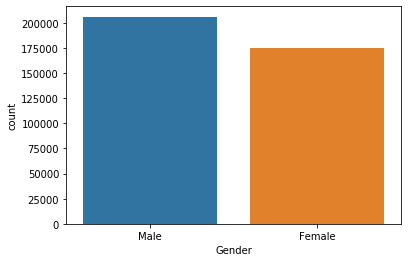

In [100]:
sns.countplot(df['Gender'], order = df['Gender'].value_counts().index)

In [101]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

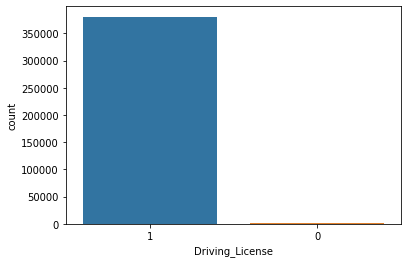

In [102]:
sns.countplot(df['Driving_License'], order = df['Driving_License'].value_counts().index)

In [103]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

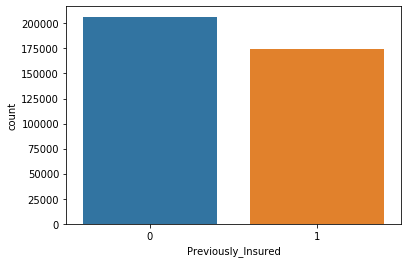

In [104]:
sns.countplot(df['Previously_Insured'], order = df['Previously_Insured'].value_counts().index)

In [105]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

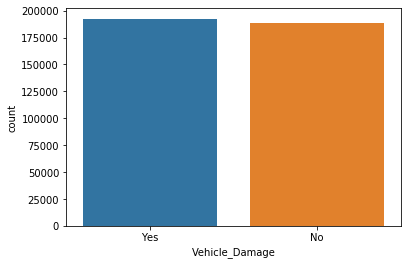

In [106]:
sns.countplot(df['Vehicle_Damage'], order = df['Vehicle_Damage'].value_counts().index)

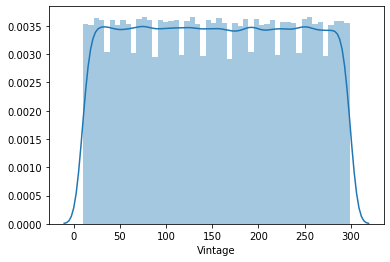

In [107]:
sns.distplot(df['Vintage'],kde = True)

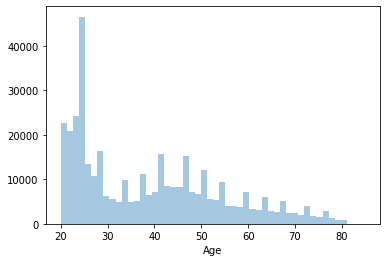

In [108]:
sns.distplot(df['Age'],kde = False)

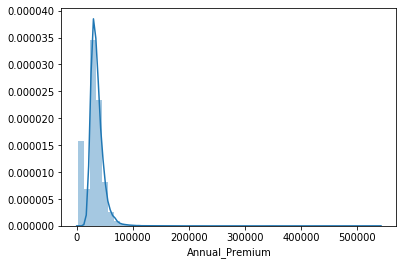

In [110]:
sns.distplot(df['Annual_Premium'],kde = True)

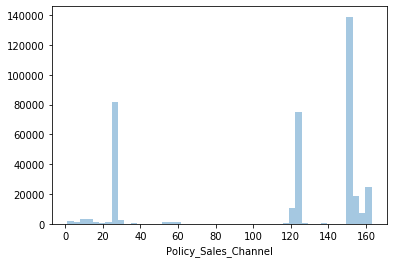

In [113]:
sns.distplot(df['Policy_Sales_Channel'],kde = False)

In [114]:
df.dtypes

id                           int64
Gender                      object
Age                          int64
Driving_License              int64
Previously_Insured           int64
Vehicle_Age                  int32
Vehicle_Damage              object
Annual_Premium             float64
Policy_Sales_Channel       float64
Vintage                      int64
Response                     int64
Region_Code_freq_encode    float64
dtype: object

label encoding = vehicle age

get dummies = gender,vehicle damage

region code = frequency encoding

### Frequency Encoding 

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Region_Code_freq_encode
0,1,Male,44,1,0,> 2 Years,Yes,40454.0,26.0,217,1,0.279225
1,2,Male,76,1,0,1-2 Year,No,33536.0,26.0,183,0,0.024274
2,3,Male,47,1,0,> 2 Years,Yes,38294.0,26.0,27,1,0.279225
3,4,Male,21,1,1,< 1 Year,No,28619.0,152.0,203,0,0.024224
4,5,Female,29,1,1,< 1 Year,No,27496.0,152.0,39,0,0.047921
5,6,Female,24,1,0,< 1 Year,Yes,2630.0,160.0,176,0,0.020083
6,7,Male,23,1,0,< 1 Year,Yes,23367.0,152.0,249,0,0.024224
7,8,Female,56,1,0,1-2 Year,Yes,32031.0,26.0,72,1,0.279225
8,9,Female,24,1,1,< 1 Year,No,27619.0,152.0,28,0,0.024274
9,10,Female,32,1,1,< 1 Year,No,28771.0,152.0,80,0,0.016478


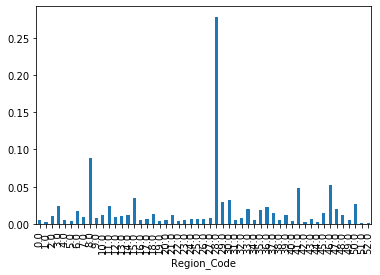

In [4]:
fq = df.groupby('Region_Code').size()/len(df)    
# mapping values to dataframe 
df.loc[:, "{}_freq_encode".format('Region_Code')] = df['Region_Code'].map(fq)   
# drop original column. 
df = df.drop(['Region_Code'], axis = 1)  
fq.plot.bar(stacked = True)   
df.head(10)

### Label encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_label = df
df_label['Vehicle_Age'] = label_encoder.fit_transform(df[['Vehicle_Age']])

C:\Users\pravar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Creating dummies

In [6]:
df_dummy = pd.get_dummies(df_label,columns = ['Gender','Vehicle_Damage'], drop_first = True)

In [7]:
df1 = df_dummy

### Scaling data

In [15]:
df2 = df1.drop(['id','Response'], axis=1)

In [16]:
train_y = df1['Response']

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
cols = df2.columns

In [18]:
train_x_scaled = scaler.fit_transform(df2)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Age,Driving_License,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Region_Code_freq_encode,Gender_Male,Vehicle_Damage_Yes
0,0.333777,0.046208,-0.919638,2.568150,0.574539,-1.587234,0.748795,1.576430,0.921545,0.990294
1,2.396751,0.046208,-0.919638,-0.893873,0.172636,-1.587234,0.342443,-0.667688,0.921545,-1.009801
2,0.527181,0.046208,-0.919638,2.568150,0.449053,-1.587234,-1.521998,1.576430,0.921545,0.990294
3,-1.148985,0.046208,1.087384,0.837139,-0.113018,0.737321,0.581474,-0.668126,0.921545,-1.009801
4,-0.633242,0.046208,1.087384,0.837139,-0.178259,0.737321,-1.378580,-0.459545,-1.085134,-1.009801


### Modelling

In [11]:
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier

In [19]:
lightclassifier = LGBMClassifier(class_weight= 'balanced',n_estimators= 500)

In [20]:
lightclassifier.fit(train_x_scaled, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [21]:
train_predict = lightclassifier.predict_proba(train_x_scaled)[:,1]
train_predict

array([8.64203328e-01, 6.66072712e-02, 8.61242395e-01, ...,
       1.29432718e-04, 3.40709497e-01, 2.37906467e-01])

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_y,train_predict)

0.8801423888611667

Importing test data and processing test data

In [71]:
test_df = pd.read_csv('test.csv_yAFwdy2 (1)/test.csv')

In [72]:
tdf = test_df

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Region_Code_freq_encode
0,381110,Male,25,1,1,< 1 Year,No,35786.0,152.0,53,0.024371
1,381111,Male,40,1,0,1-2 Year,Yes,33762.0,7.0,111,0.279619
2,381112,Male,47,1,0,1-2 Year,Yes,40050.0,124.0,199,0.279619
3,381113,Male,24,1,1,< 1 Year,Yes,37356.0,152.0,187,0.006990
4,381114,Male,27,1,1,< 1 Year,No,59097.0,152.0,297,0.279619
5,381115,Male,22,1,1,< 1 Year,No,40207.0,152.0,266,0.032156
6,381116,Female,51,1,1,1-2 Year,No,40118.0,26.0,107,0.014500
7,381117,Male,25,1,1,< 1 Year,No,23375.0,152.0,232,0.048309
8,381118,Male,42,1,0,1-2 Year,Yes,2630.0,26.0,277,0.048309
9,381119,Female,37,1,1,1-2 Year,No,27124.0,124.0,133,0.008163


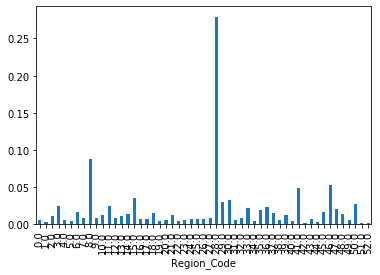

In [73]:
fq = tdf.groupby('Region_Code').size()/len(tdf)    
# mapping values to dataframe 
tdf.loc[:, "{}_freq_encode".format('Region_Code')] = tdf['Region_Code'].map(fq)   
# drop original column. 
tdf = tdf.drop(['Region_Code'], axis = 1)  
fq.plot.bar(stacked = True)   
tdf.head(10)

In [74]:
label_encoder = LabelEncoder()
tdf_label = tdf
tdf_label['Vehicle_Age'] = label_encoder.fit_transform(tdf[['Vehicle_Age']])

C:\Users\pravar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
tdf_dummy = pd.get_dummies(tdf_label,columns = ['Gender','Vehicle_Damage'], drop_first = True)

In [76]:
tdf1 = tdf_dummy

In [77]:
scaler = StandardScaler()

In [78]:
test_id  = tdf1['id']

In [79]:
test_x = tdf1.drop(['id'], axis=1)

In [80]:
cols = test_x.columns

In [81]:
test_x_scaled = scaler.fit_transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,Age,Driving_License,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Region_Code_freq_encode,Gender_Male,Vehicle_Damage_Yes
0,-0.890089,0.043233,1.083387,0.836715,0.310492,0.739349,-1.211054,-0.665682,0.928294,-1.004995
1,0.079795,0.043233,-0.923031,-0.895018,0.191048,-1.927487,-0.517782,1.576773,0.928294,0.995030
2,0.532408,0.043233,-0.923031,-0.895018,0.562126,0.224373,0.534079,1.576773,0.928294,0.995030
3,-0.954748,0.043233,1.083387,0.836715,0.403143,0.739349,0.390643,-0.818379,0.928294,0.995030
4,-0.760771,0.043233,1.083387,0.836715,1.686159,0.739349,1.705469,1.576773,0.928294,-1.004995


In [50]:
import numpy as np

In [48]:
from sklearn.model_selection import StratifiedKFold

def kfold_predictions( model , n_splits , train_x , train_y, test_x ):
    ## Initializing empty Numpy Arrays
    train_pred = np.empty((0,0) , int)
    skfold = KFold(n_splits, random_state = 9)
  
    #For every permutation of KFold
    for i,j in skfold.split(train_x, train_y):
        x_train, x_test = train_x.iloc[i], train_x.iloc[j]
        y_train, y_test = train_y.iloc[i], train_y.iloc[j]
    
        #Train a model on training set
        model.fit( X = x_train, y = y_train)
    
        #Predict on Chosen Group
        tmp = model.predict_proba(x_test)[:,1]
    
        #Storing train predictions
        train_pred = np.append(train_pred, tmp)
    
    #Training on complete data and generating Predictionson Test set
    model.fit(train_x, train_y)
    test_pred = model.predict_proba(test_x)[:,1]
  
    return train_pred, test_pred

In [51]:
lightclassifier = LGBMClassifier(class_weight= 'balanced')
M1_train, M1_test = kfold_predictions( lightclassifier, 10, train_x_scaled, train_y, test_x_scaled)

C:\Users\pravar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [82]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(class_weight  = 'balanced', random_state=0)
# M2_train, M2_test = kfold_predictions( classifier, 10, train_x_scaled, train_y, test_x_scaled)

In [83]:
# from catboost import Pool, CatBoostClassifier, cv, CatBoostRegressor

In [84]:
# model = CatBoostClassifier(iterations=1500,random_seed=42)

In [ ]:
# M3_train, M3_test = kfold_predictions(model, 10, train_x_scaled, train_y, test_x_scaled)

In [86]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_y,M1_train)

0.8574205078502753

In [87]:
M1_test

array([6.58150016e-04, 7.50770147e-01, 7.50305616e-01, ...,
       4.89538196e-04, 2.75204613e-04, 2.51675776e-03])

In [88]:
test_id.head()

0    381110
1    381111
2    381112
3    381113
4    381114
Name: id, dtype: int64

In [90]:
final_lightgbm_k_fold = pd.DataFrame(columns = ['id','Response'])

In [91]:
final_lightgbm_k_fold['id'] = test_id

In [95]:
final_lightgbm_k_fold['Response'] = M1_test

In [96]:
final_lightgbm_k_fold.head()

,id,Response
0,381110,0.000658
1,381111,0.750770
2,381112,0.750306
3,381113,0.029491
4,381114,0.000798


In [97]:
final_lightgbm_k_fold.to_csv('final_lightgbm_k_fold.csv')